### Import packages

In [1]:
## numpy: package for cumputing numerical arrays
from numpy.linalg import inv #inverse of a matrix
import numpy as np
np.set_printoptions(precision=4) #precision of arrays
#i have set a custom threshold of 9 sigfigs after decimal

## matplotlib: package for plotting
from matplotlib import pyplot as plt
%matplotlib inline

## import functions from twinning
import sys; sys.path.insert(0, '..')
from nmgjunctions.twinning import *

### 10M Ni-Mn-Ga

1. Lattice parameters
2. Irrational element of NC twins

In [2]:
## lattice parameters
a,b,c,gamma = [0.5972, 0.5944, 0.5584, np.deg2rad(90.37)] #NMG lattice parameter: Seiner et al. (2019)
#a,b,c,gamma = [1., 0.97, 0.94, np.deg2rad(94)] #Exaggerated lattice

## irrational element of NC twins
q3 = (2*a*b*np.cos(gamma) - np.sqrt(a**4 + b**4 + 2*a**2*b**2*np.cos(2*gamma)))/(a**2 - b**2)
q4 = (2*a*b*np.cos(gamma) + np.sqrt(a**4 + b**4 + 2*a**2*b**2*np.cos(2*gamma)))/(a**2 - b**2)
print ('q₃ = %.3f, q₄ = %.3f' % (q3, q4))
## q4 * q3 ≃ -1

q₃ = -3.074, q₄ = 0.325


### $V_2$

[[ 1.     -0.0064  0.    ]
 [ 0.      0.9953  0.    ]
 [ 0.      0.      0.935 ]]


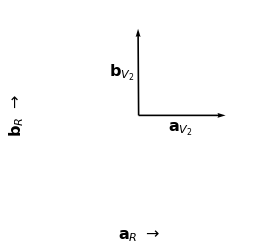

In [3]:
## Transformation: R ↔ V₂
rPv2 = np.array([[1,b/a*np.cos(gamma),0],[0,b/a*np.sin(gamma),0],[0,0,c/a]])
print(applythresh(rPv2))

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv2)

ax.text(+0.015,-0.008,r'$\mathbf{a}_{V_2}$',fontsize=16) #label vector a
ax.text(-0.015,+0.02,r'$\mathbf{b}_{V_2}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

### $V_4$

[[-0.0111  0.9953  0.    ]
 [ 0.9999  0.0046  0.    ]
 [ 0.      0.     -0.935 ]]


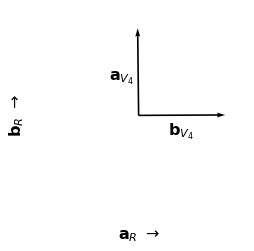

In [4]:
## Transformation relation: R ↔ V₄

#(1 1 0) compound twin
rL_v2tov4 = rotationmatrix([1,1,0] @ inv(rPv2), np.pi)

#Orientation Relationship   ᴿL : V₂ → V₄
rPv4 = rL_v2tov4 @ rPv2

print(rPv4)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv4)

ax.text(-0.015,0.018,r'$\mathbf{a}_{V_4}$',fontsize=16) #label vector a
ax.text(+0.015,-0.010,r'$\mathbf{b}_{V_4}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

### $V_3$

[[ 0.0018 -0.9953  0.    ]
 [ 1.     -0.0046  0.    ]
 [ 0.      0.      0.935 ]]


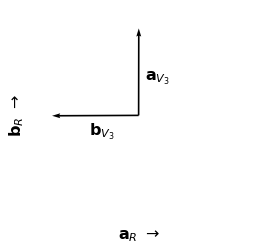

In [5]:
## Transformation relation: R ↔ V₃

#(1̅ 0 0) compound twin
rL_v4tov3 = rotationmatrix([-1,0,0] @ inv(rPv4), np.pi)

#Orientation Relationship   ᴿL : V₄ → V₃
rPv3 = rL_v4tov3 @ rPv4

print(rPv3)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv3)

ax.text(+0.003,0.018,r'$\mathbf{a}_{V_3}$',fontsize=16) #label vector a
ax.text(-0.025,-0.010,r'$\mathbf{b}_{V_3}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

### $V^*_2$

[[ 1.      0.0033  0.    ]
 [-0.0098  0.9953  0.    ]
 [ 0.      0.      0.935 ]]


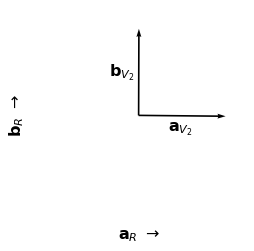

In [6]:
## Transformation relation: R ↔ V₂

#(1 q4 0) NC twins
C = applythresh(rotationmatrix([0,0,-1],np.pi/2)) 
rL_v3tov2 = OR_RefFrame([1,q4,0],[-q4,1,0],C,rPv3,a)

#Orientation Relationship   ᴿL : V₃ → V₂*
rPv2s = rL_v3tov2 @ rPv3

print(rPv2s)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv2s)

ax.text(+0.015,-0.008,r'$\mathbf{a}_{V_2}$',fontsize=16) #label vector a
ax.text(-0.015,+0.02,r'$\mathbf{b}_{V_2}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

### $V_2 \to V_4 \to V_3 \to V_2$

In [7]:
### V₂ → V₄ → V₃ → V₂

## V₂
#Angle between (1 q̅₃ 0) and (1 1 0) pair
alpha1 = angleTBpair(rPv2,[1,-q3,0],[1,1,0])
print('angle between (1 q̅₃ 0) and (1 1 0) pair: %.4f degrees' % alpha1)

## V₄
#Angle between (1 1 0) and (1̅ 0 0) pair
alpha2 = 180 - angleTBpair(rPv4,[1,1,0],[-1,0,0])
print('angle between (1 1 0) and (1̅ 0 0) pair: %.4f degrees' % alpha2)

## V₃
#Angle between (1̅ 0 0) and (1 q̅₄ 0) pair
alpha3 = 180 + angleTBpair(rPv2,[-1,0,0],[1,-q4,0])
print('angle between (1̅ 0 0) and (1 q̅₄ 0) pair: %.4f degrees' % alpha3)

### disclination strength
angle = alpha1 + alpha2 + alpha3
print ('ω = %.4f degrees' % (360 - angle))
del angle,alpha1,alpha2,alpha3

angle between (1 q̅₃ 0) and (1 1 0) pair: 26.7730 degrees
angle between (1 1 0) and (1̅ 0 0) pair: 135.0512 degrees
angle between (1̅ 0 0) and (1 q̅₄ 0) pair: 198.1375 degrees
ω = 0.0383 degrees


### $V_4 \to V_2 \to V_3 \to V_4$

In [8]:
### V₄ → V₂ → V₃ → V₄

## V₄
#Angle between (1 0 0) and (1 1 0) pair
alpha1 = angleTBpair(rPv4,[1,0,0],[1,1,0])
print('angle between (1 0 0) and (1 1 0) pair: %.4f degrees' % alpha1)

## V₂
#Angle between (1 1 0) and (1̅ q₃ 0) pair
alpha2 = 180 - angleTBpair(rPv2,[1,1,0],[-1,q3,0])
print('angle between (1 1 0) and (1̅ q₃ 0) pair: %.4f degrees' % alpha2)

## V₃
#Angle between (1̅ q₄ 0) and (1 1 0) pair
alpha3 = 180 - angleTBpair(rPv3,[-1,q4,0],[1,0,0])
print('angle between (1̅ q₄ 0) and (1 1 0) pair: %.4f degrees' % alpha3)

### disclination strength
angle = alpha1 + alpha2 + alpha3
print ('ω = %.4f degrees' % (360 - angle))
del angle,alpha1,alpha2,alpha3

angle between (1 0 0) and (1 1 0) pair: 44.9488 degrees
angle between (1 1 0) and (1̅ q₃ 0) pair: 153.2270 degrees
angle between (1̅ q₄ 0) and (1 1 0) pair: 161.8625 degrees
ω = -0.0383 degrees


#### $M\ =\ ^RL(V_3 \to V_2)\ ^RL(V_4 \to V_3)\ ^RL(V_2 \to V_4)$

In [9]:
M = rL_v3tov2 @ rL_v4tov3 @ rL_v2tov4
print(M)
np.rad2deg(np.arcsin(M[0,1]))

[[ 1.      0.0098  0.    ]
 [-0.0098  1.      0.    ]
 [ 0.      0.      1.    ]]


0.5600737003415089